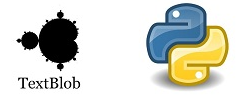

## **Análisis de Twitter con Tweepy y TexBlob**

Un "tuit" o tweet es una publicación de un usuario en la red social Twitter. Como parte del mensaje, podemos encontrar además de texto, diferentes elementos multimedia (imagenes, videos, audio, etc.), enlaces y los populares emoticones.

La estructura de un tweet la podemos observar en la siguiente imagen:

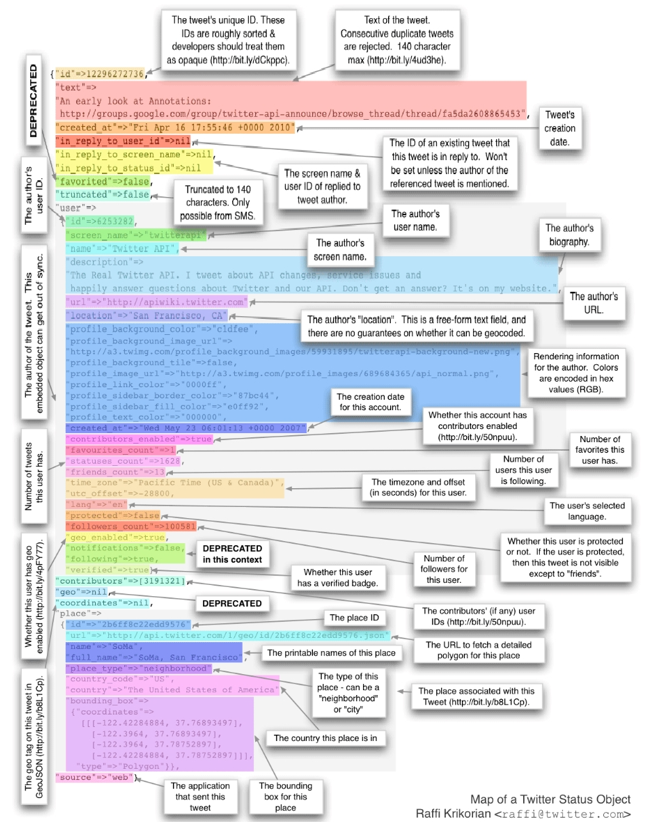

El diccionario de datos del objeto "tweet" se describe en: https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet

### **1. Importación de librerias**

In [1]:
import pandas as pd
import numpy as np
import json

### **2. Extracción de Tweets**

Cargamos el archivo texto generado por el **API de Twitter**, conteniendo los datos de los tweets (un tweet por linea)

In [2]:
tweets_data_path='tweet_c.txt'
tweets_data=[]
tweets_file=open(tweets_data_path,"r")
# Leemos los tweets y los pasamos a una lista llamada tweets_data
for line in tweets_file:
    tweet=json.loads(line)
    tweets_data.append(tweet)
tweets_file.close()

***Observamos los datos del primer tweet***

In [3]:
tweets_data[0]

{'created_at': 'Thu Nov 11 05:55:38 +0000 2021',
 'id': 1458674760704004098,
 'id_str': '1458674760704004098',
 'text': "RT @Steam_Exchange: We're excited to connect with the Asia Blockchain Community to share more about #SteamExchange - a global initiative wi…",
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 1391956831879286786,
  'id_str': '1391956831879286786',
  'name': '#EshibArmy !!!!!Tiffany Barnes ☕️🌟!!!',
  'screen_name': 'Tiffany09487110',
  'location': None,
  'url': None,
  'description': None,
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 151,
  'friends_count': 1776,
  'listed_count': 1,
  'favourites_count': 2809,
  'statuses_count': 1966,
  'created_at': 'Tue May 11 03:22:51 

Podemos crear listas para contener cada una de las columnas con los datos relevantes

In [4]:
# Extraemos algunas variables relevantes
ids = [tweet['id_str'] for tweet in tweets_data]
times = [tweet['created_at'] for tweet in tweets_data]
users = [tweet['user']['name'] for tweet in tweets_data]
texts = [tweet['text'] for tweet in tweets_data]
lats = [(T['geo']['coordinates'][0] if T['geo'] else None) for T in tweets_data]
lons = [(T['geo']['coordinates'][1] if T['geo'] else None) for T in tweets_data]
place_names = [(T['place']['full_name'] if T['place'] else None) for T in tweets_data]
place_types = [(T['place']['place_type'] if T['place'] else None) for T in tweets_data]

In [5]:
print(ids[0], times[0], users[0],texts[0],lats[0], lons[0])

1458674760704004098 Thu Nov 11 05:55:38 +0000 2021 #EshibArmy !!!!!Tiffany Barnes ☕️🌟!!! RT @Steam_Exchange: We're excited to connect with the Asia Blockchain Community to share more about #SteamExchange - a global initiative wi… None None


Como se puede observar, los datos se encuentran crudos.  Tendremos que pasar los datos relevantes de los tweets a un dataframe para pader trabajarlos.

### **3. Creación del Dataframe**

In [6]:
#Creamos el dataframe
data = pd.DataFrame()

In [7]:
# Datos relevantes, creamos las nuevas columnasa partir de las listas de datos de los tweets recolectados
data['id']   = np.array([tweet['id_str'] for tweet in tweets_data])
data['created_at'] = np.array( [tweet['created_at'] for tweet in tweets_data])
data['user_name'] = np.array( [tweet['user']['name'] for tweet in tweets_data])
data['text'] = np.array([tweet['text'] for tweet in tweets_data])
data['len'] = np.array([len(tweet['text']) for tweet in tweets_data])
data['source'] = np.array([tweet['source'] for tweet in tweets_data])
data['likes']  = np.array([tweet['user']['favourites_count'] for tweet in tweets_data])
data['RTs']    = np.array([tweet['retweet_count'] for tweet in tweets_data])
data['lat'] =  np.array([(T['geo']['coordinates'][0] if T['geo'] else None) for T in tweets_data])
data['lon'] =  np.array([(T['geo']['coordinates'][1] if T['geo'] else None) for T in tweets_data])

In [8]:
data.head()

,id,created_at,user_name,text,len,source,likes,RTs,lat,lon
0,1458674760704004098,Thu Nov 11 05:55:38 +0000 2021,#EshibArmy !!!!!Tiffany Barnes ☕️🌟!!!,RT @Steam_Exchange: We're excited to connect w...,140,"<a href=""http://twitter.com/download/iphone"" r...",2809,0,None,None
1,1458674760557404160,Thu Nov 11 05:55:38 +0000 2021,BELIEVER,The $FEG community wants to be listed on @Robi...,140,"<a href=""http://twitter.com/download/android"" ...",399,0,None,None
2,1458674761400209411,Thu Nov 11 05:55:38 +0000 2021,bora aka disgraced cosmonaut,RT @Ars33n1k: 400$ ÇEKİLİŞ 4 KİŞİYE ( Kişi baş...,140,"<a href=""http://twitter.com/download/android"" ...",13405,0,None,None
3,1458674761517568003,Thu Nov 11 05:55:38 +0000 2021,Aku@bo 🍥,"RT @Bang_Garr: $400 CRYPTO || 5,6 JUTA IDR ||\...",140,"<a href=""http://twitter.com/download/android"" ...",2661,0,None,None
4,1458674762004140033,Thu Nov 11 05:55:38 +0000 2021,NovemberWin🙏,RT @vEmpiredigital: 🚨🐶@SHIBtoken NFTs🐶🚨\n\nTo ...,140,"<a href=""http://twitter.com/download/android"" ...",3680,0,None,None


### **4. Visualización y estadisticas básicas**

Primero queremos calcular algunos datos estadísticos básicos, como la media de la longitud de los caracteres de todos los tweets, el tweet con más me gusta y retweets, etc.

In [9]:
print ('Total de tweets:', len(data.index))

Total de tweets: 1000


#### **4.1. Cálculo de media, máximo y mínimo**

**Media de longitud de tweets, likes y retweets**

In [10]:
#Para obtener la "media", el valor maximo y minimo utilizamos la libreria numpy:

# Extraemos la media de la variable 'len' que contiene las longitudes de los tweets:
mean = np.mean(data['len'])

print("Longitud promedio de los tweets: {}".format(mean))

Longitud promedio de los tweets: 125.051


In [11]:
# Likes
print ('Promedio de likes:', round(data['likes'].mean(),2), '\n')

Promedio de likes: 10237.2 



In [12]:
# Retweets
print ('Promedio de RTs:', round(data['RTs'].mean(),2), '\n')

Promedio de RTs: 0.0 



In [13]:
# Extraemos los tweets con más Me gusta (Likes) y más retweets (RTs):

fav_max = np.max(data['likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

In [14]:
# Indice del Tweet con mas likes
fav_max, data.index[fav]

(628420, 387)

In [15]:
# Tweet con mas likes
data['text'][data.index[fav]], data['likes'][data.index[fav]]

('RT @LacedWhales: 🐳 #Cardano $ADA Whale ❤️laced!\n💰 Transaction Output: 9.7M ₳D₳ / 20.61M USD \n👁️ Tx info:\n➡️ https://t.co/N0YeTJRaYx\n\n🙏Suppo…',
 628420)

In [16]:
rt_max, data.index[rt]

(0, 0)

In [17]:
# Tweet con mas RTs
data['text'][data.index[rt]], data['RTs'][data.index[rt]]

("RT @Steam_Exchange: We're excited to connect with the Asia Blockchain Community to share more about #SteamExchange - a global initiative wi…",
 0)

### **2.2. Time series**

Pandas tiene su propio objeto para series de tiempo. Dado que tenemos un vector completo con fechas de creación, podemos construir series de tiempo respetando la duración de los tweets, los me gusta y los retweets. La forma en que lo hacemos es:

In [18]:
# Creamos series de tiempo para los datos:

tlen = pd.Series(data=data['len'].values, index=data['created_at'])
tfav = pd.Series(data=data['likes'].values, index=data['created_at'])
tret = pd.Series(data=data['RTs'].values, index=data['created_at'])

Y si queremos trazar la serie temporal, los pandas ya tienen su propio método en el objeto. Podemos trazar una serie de tiempo de la siguiente manera:

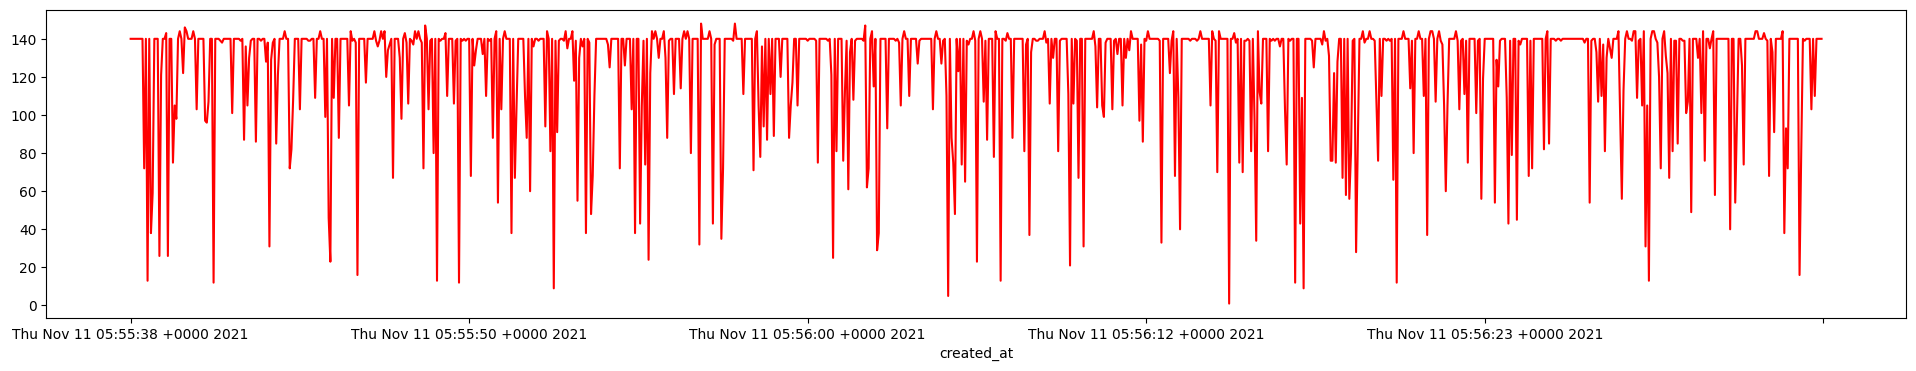

In [19]:
# Lenghts along time:
tlen.plot(figsize=(24,4), color='r');

Y para trazar los me gusta frente a los retweets en el mismo gráfico:

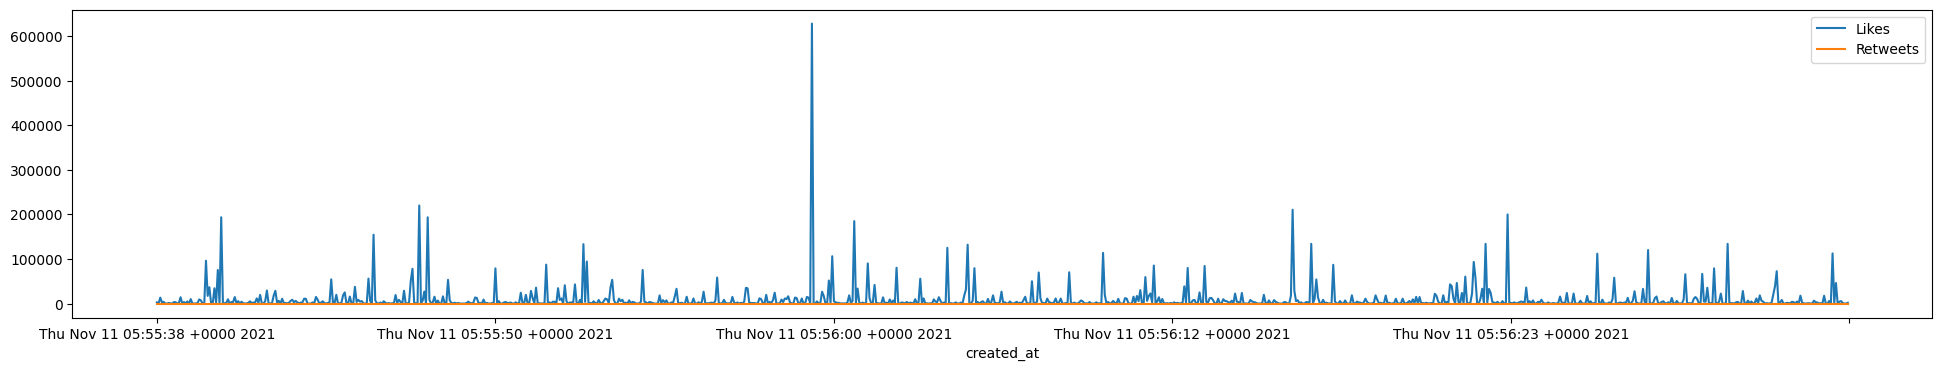

In [20]:
# Likes vs retweets visualization:
tfav.plot(figsize=(24,4), label="Likes", legend=True)
tret.plot(figsize=(24,4), label="Retweets", legend=True);

### **2.3. Gráficos circulares (Pie)**

Ahora trazaremos las fuentes en un gráfico circular, ya que nos dimos cuenta de que no todos los tweets provienen de la misma fuente.

In [21]:
# Obtenemos los posibles origenes de los tweets:
sources = []
for source in data['source']:
    if source not in sources:
        sources.append(source)

# Visualizamos la lista de origenes (fuentes):
print("Lista de fuentes de los tweets:")
for source in sources:
    print("* {}".format(source))

Lista de fuentes de los tweets:
* <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
* <a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>
* <a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>
* <a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>
* <a href="http://publicize.wp.com/" rel="nofollow">WordPress.com</a>
* <a href="https://help.twitter.com/en/using-twitter/how-to-tweet#source-labels" rel="nofollow">CryptoLit</a>
* <a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>
* <a href="http://example.com" rel="nofollow">zewlond</a>
* <a href="https://help.twitter.com/en/using-twitter/how-to-tweet#source-labels" rel="nofollow">Huh huh. We farted</a>
* <a href="https://cryptocryptonews.com" rel="nofollow">Crypto Crypto News </a>
* <a href="https://www.viralsweep.com/" rel="nofollow">ViralSweep App</a>
* <a href="https://spences10.github.io" r

Ahora contamos el número de cada fuente y creamos un gráfico circular.

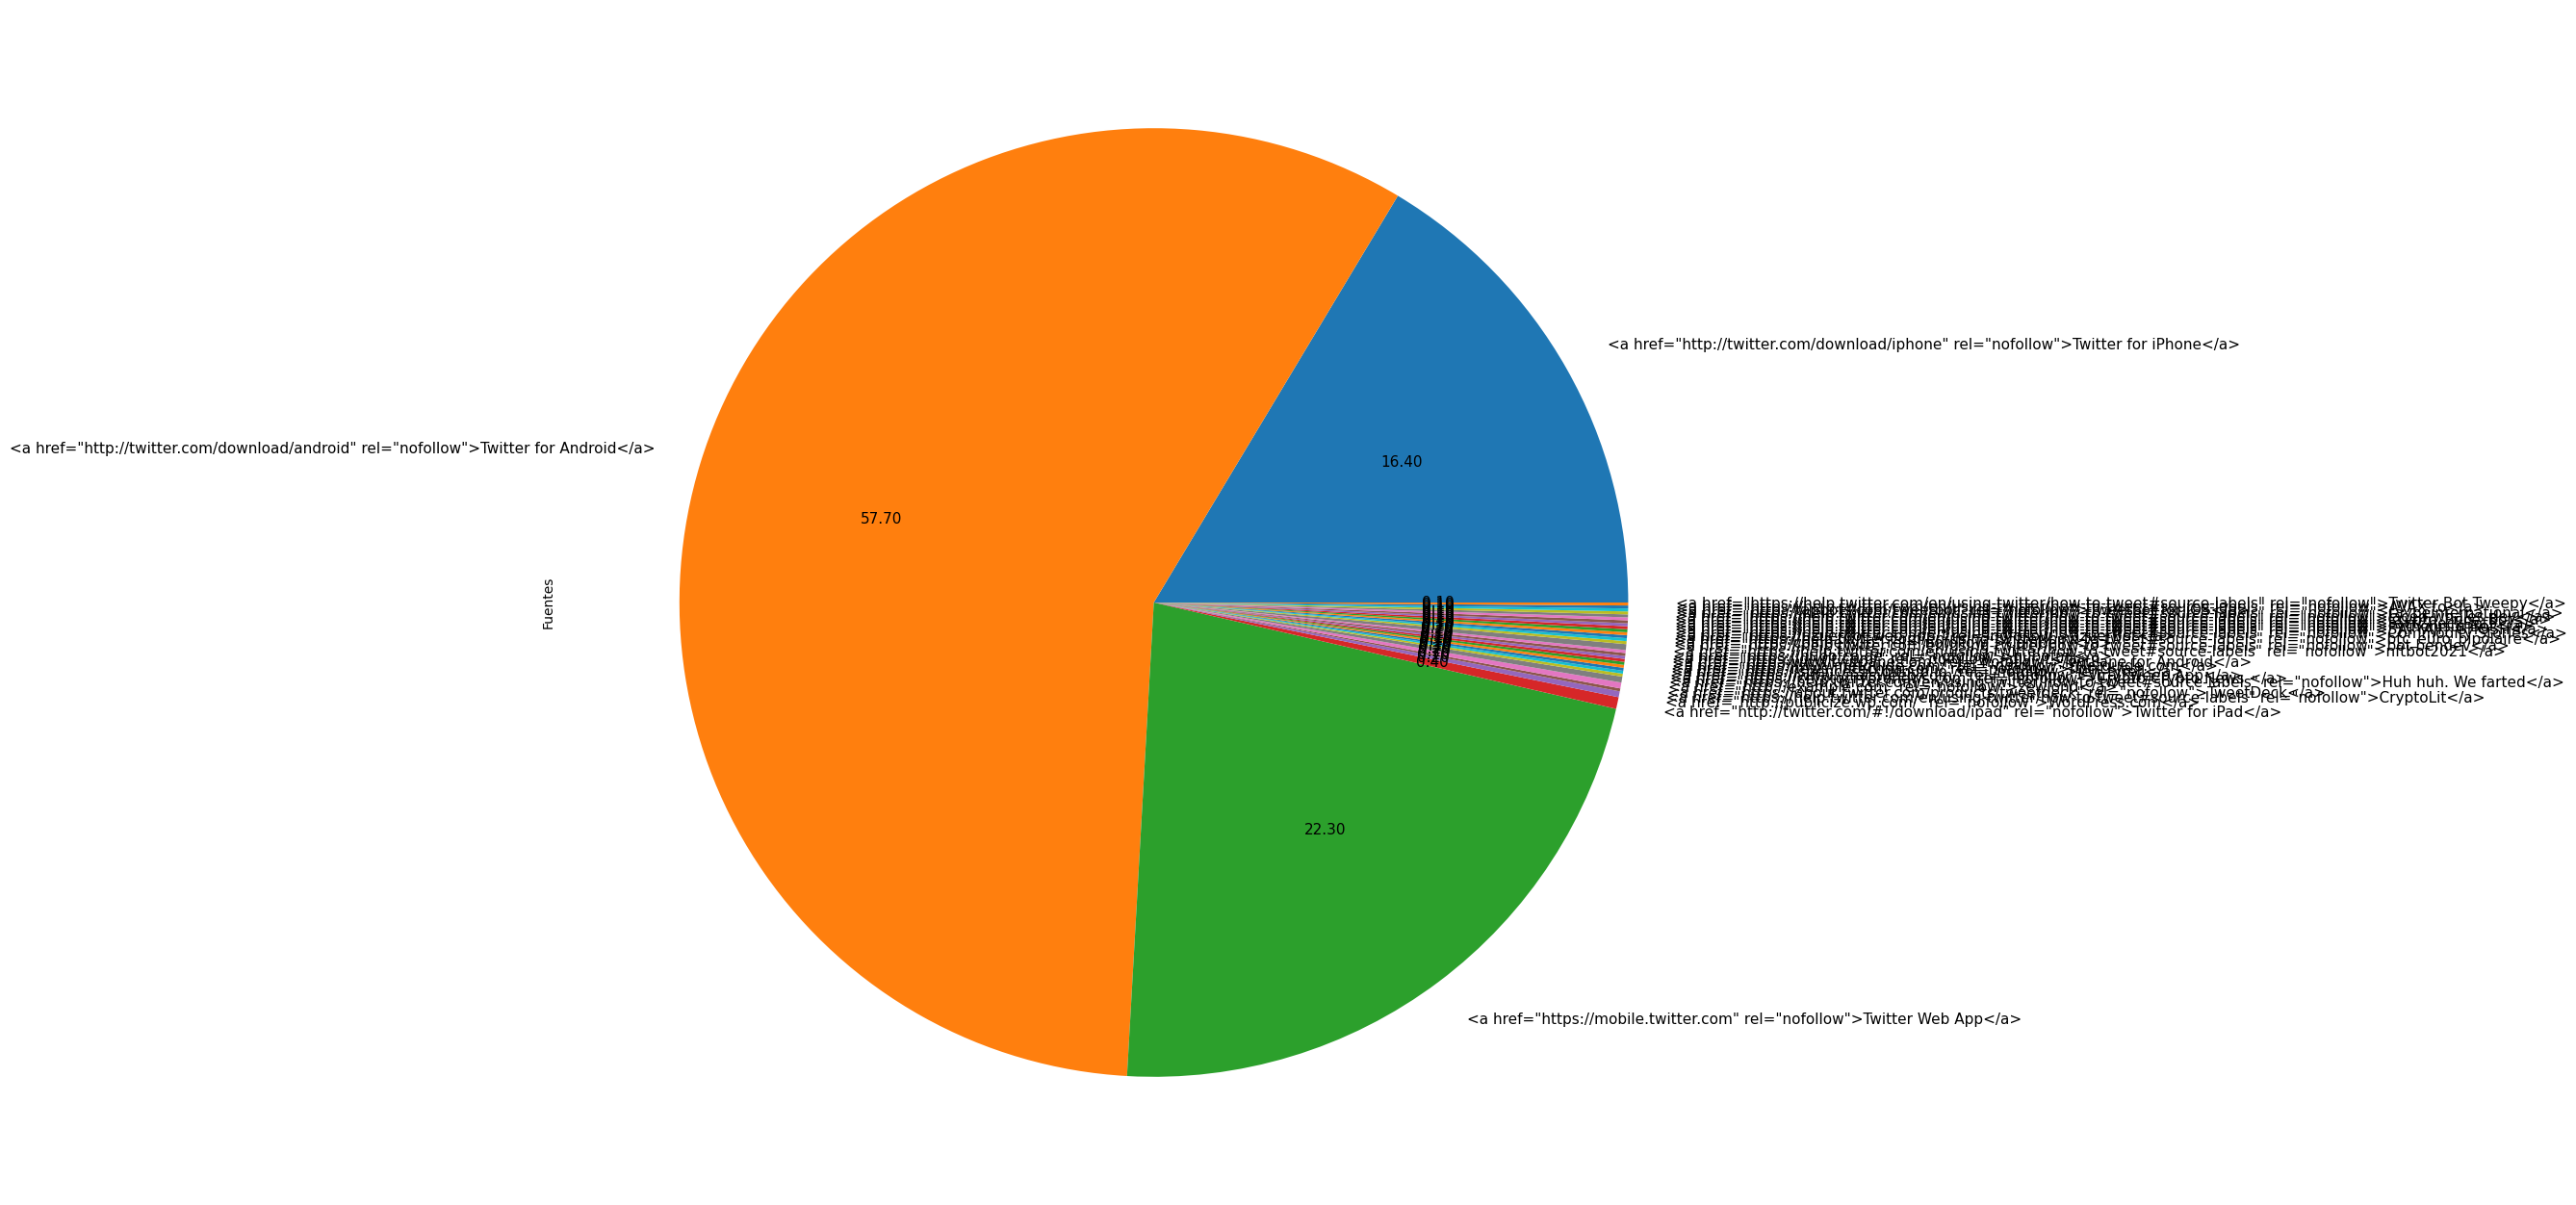

In [25]:
# Creamos un vector numpy asignado a etiquetas:
percent = np.zeros(len(sources))

for source in data['source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Grafico de torta:
pie_chart = pd.Series(percent, index=sources, name='Fuentes')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(16, 16));

## **3. Analisis de Sentimientos**

**Textblob** nos permitirá hacer análisis de sentimiento de una manera muy sencilla. También usaremos la librería **re** de Python, que se usa para trabajar con expresiones regulares. Para esto, le daremos dos funciones de utilidad para:

**a) limpiar texto** (lo que significa que cualquier símbolo distinto a un valor alfanumérico será reasignado a uno nuevo que satisfaga esta condición), y

**b) crear un clasificador** para analizar el polaridad de cada tweet después de limpiar el texto que contiene.

## **3.1 Importando Textblob**

In [27]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Función de utilidad para limpiar el texto de un tweet eliminando
     enlaces y caracteres especiales utilizando expresiones regulares.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Función de utilidad para clasificar la polaridad de un tweet
     usando textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0: # Positivo
        return 1
    elif analysis.sentiment.polarity == 0: #Neutral
        return 0
    else:
        return -1 #Negativo

Textblob ya proporciona un analizador entrenado (mucho más facil, ¿verdad?). **Textblob** puede trabajar con diferentes modelos de aprendizaje automático utilizados en el procesamiento del lenguaje natural (NLP). De todos modos, volviendo al código, solo agregaremos una columna adicional a nuestros datos. Esta columna contendrá el análisis de sentimiento (polaridad del comentario) y podemos visualizar el dataframe para ver la actualización:

In [29]:
# Creamos una columna llamasa SA para el resultado del análisis de sentimiento:
# 1 = Positivo
# 0 = Neutral
#-1 = Negativo

data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['text'] ])

# Mostramos el dataframe actualizado con la nueva columna:
data.head(10)

,id,created_at,user_name,text,len,source,likes,RTs,lat,lon,SA
0,1458674760704004098,Thu Nov 11 05:55:38 +0000 2021,#EshibArmy !!!!!Tiffany Barnes ☕️🌟!!!,RT @Steam_Exchange: We're excited to connect w...,140,"<a href=""http://twitter.com/download/iphone"" r...",2809,0,None,None,1
1,1458674760557404160,Thu Nov 11 05:55:38 +0000 2021,BELIEVER,The $FEG community wants to be listed on @Robi...,140,"<a href=""http://twitter.com/download/android"" ...",399,0,None,None,1
2,1458674761400209411,Thu Nov 11 05:55:38 +0000 2021,bora aka disgraced cosmonaut,RT @Ars33n1k: 400$ ÇEKİLİŞ 4 KİŞİYE ( Kişi baş...,140,"<a href=""http://twitter.com/download/android"" ...",13405,0,None,None,0
3,1458674761517568003,Thu Nov 11 05:55:38 +0000 2021,Aku@bo 🍥,"RT @Bang_Garr: $400 CRYPTO || 5,6 JUTA IDR ||\...",140,"<a href=""http://twitter.com/download/android"" ...",2661,0,None,None,0
4,1458674762004140033,Thu Nov 11 05:55:38 +0000 2021,NovemberWin🙏,RT @vEmpiredigital: 🚨🐶@SHIBtoken NFTs🐶🚨\n\nTo ...,140,"<a href=""http://twitter.com/download/android"" ...",3680,0,None,None,-1
5,1458674762172014592,Thu Nov 11 05:55:38 +0000 2021,Saleh,RT @Cryptreedk: 💰🔥HUGE 25000$ WORTH LOTTERY AN...,140,"<a href=""https://mobile.twitter.com"" rel=""nofo...",125,0,None,None,1
6,1458674762071384071,Thu Nov 11 05:55:38 +0000 2021,Lilian,24-Hour Crypto Market Activity via #LunarCrush...,140,"<a href=""http://twitter.com/download/android"" ...",27,0,None,None,1
7,1458674761811185665,Thu Nov 11 05:55:38 +0000 2021,Deepak pandey,24-Hour Crypto Market Activity via #LunarCrush...,140,"<a href=""http://twitter.com/download/android"" ...",1448,0,None,None,1
8,1458674762561974273,Thu Nov 11 05:55:38 +0000 2021,ara aya ❤,@blockchain Join $ELON on a mission to Mars! #...,72,"<a href=""http://twitter.com/download/android"" ...",555,0,None,None,0
9,1458674762499063809,Thu Nov 11 05:55:38 +0000 2021,Dhanasekar,@cryptocom To enhance the success of your Cryp...,140,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0,0,None,None,1


## **3.2. Analizando los resultados**

Para tener una forma sencilla de verificar los resultados, contaremos el número de tweets neutrales, positivos y negativos y extraeremos los porcentajes.

In [30]:
# Construimos listas con tweets clasificados:

pos_tweets = [ tweet for index, tweet in enumerate(data['text']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['text']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['text']) if data['SA'][index] < 0]

Ahora que tenemos las listas, solo imprimimos los porcentajes:

In [31]:
# Visualizamos los %:

print("Percentaje de positivos tweets: {}%".format(len(pos_tweets)*100/len(data['text'])))
print("Percentaje de neutrales tweets: {}%".format(len(neu_tweets)*100/len(data['text'])))
print("Percentaje de negativos tweets: {}%".format(len(neg_tweets)*100/len(data['text'])))

Percentaje de positivos tweets: 40.7%
Percentaje de neutrales tweets: 52.8%
Percentaje de negativos tweets: 6.5%


Tenemos que considerar que estamos trabajando solo con los 1000 tweets. Para obtener resultados más precisos, podemos considerar más tweets.